## Observations and Insights 

In [1]:
#Observations

#1: Capomulin was effective and the tumor size decreased as time went by
#2: Tumor volume was porpotional to the weight
#3: The test was equally distrubted among Sex and Drug Regimens as the number of males and females were similar
#   and also the number of mouses tested for Drug Regimen were similar as well.



# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)



# Combine the data into a single dataset
mergedf = pd.merge(mouse_metadata, study_results, on= "Mouse ID")

# Display the data table for preview
mergedf


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
noMouse = pd.DataFrame(mergedf["Mouse ID"].value_counts())
noMouse.count()

Mouse ID    249
dtype: int64

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

mergeGroup = mergedf.groupby(["Mouse ID", "Timepoint"])
mergeDup = mergeGroup.count()
mergeDup[mergeDup["Sex"] > 1]


Drug Regimen  Sex  Age_months  Weight (g)  \
Mouse ID Timepoint                                              
g989     0                     2    2           2           2   
         5                     2    2           2           2   
         10                    2    2           2           2   
         15                    2    2           2           2   
         20                    2    2           2           2   

                    Tumor Volume (mm3)  Metastatic Sites  
Mouse ID Timepoint                                        
g989     0                           2                 2  
         5                           2                 2  
         10                          2                 2  
         15                          2                 2  
         20                          2                 2

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

mergedf[mergedf["Mouse ID"] == "g989"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
index = mergedf[mergedf["Mouse ID"] == "g989"].index
cleandf = mergedf.drop(index)
cleandf = cleandf .reset_index()
cleandf

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,0,k403,Ramicane,Male,21,16,0,45.000000,0
1,1,k403,Ramicane,Male,21,16,5,38.825898,0
2,2,k403,Ramicane,Male,21,16,10,35.014271,1
3,3,k403,Ramicane,Male,21,16,15,34.223992,1
4,4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...,...
1875,1888,z969,Naftisol,Male,9,30,25,63.145652,2
1876,1889,z969,Naftisol,Male,9,30,30,65.841013,3
1877,1890,z969,Naftisol,Male,9,30,35,69.176246,4
1878,1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
cleandf["Mouse ID"].value_counts().count()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

mean = cleandf[["Drug Regimen", "Tumor Volume (mm3)"]].groupby(["Drug Regimen"]).mean()
median = cleandf[["Drug Regimen", "Tumor Volume (mm3)"]].groupby(["Drug Regimen"]).median()
var = cleandf[["Drug Regimen", "Tumor Volume (mm3)"]].groupby(["Drug Regimen"]).var()
std = cleandf[["Drug Regimen", "Tumor Volume (mm3)"]].groupby(["Drug Regimen"]).std()
sem = cleandf[["Drug Regimen", "Tumor Volume (mm3)"]].groupby(["Drug Regimen"]).sem()
combinedf = mean
combinedf["median"] = median
combinedf["var"] = var
combinedf["std"] = std
combinedf["SEM"] = sem

combinedf



,Tumor Volume (mm3),median,var,std,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
statdf = cleandf.groupby(["Drug Regimen"])
statsummary = pd.DataFrame(statdf["Tumor Volume (mm3)"].mean())
statsummary["median"] = statdf["Tumor Volume (mm3)"].median()
statsummary["variance"] = statdf["Tumor Volume (mm3)"].var()
statsummary["standard deviation"] = statdf["Tumor Volume (mm3)"].std()
statsummary["SEM"] = statdf["Tumor Volume (mm3)"].sem()
statsummary = statsummary.rename(columns = {"Tumor Volume (mm3)" : "mean"})
statsummary



,mean,median,variance,standard deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Number of Mouse')

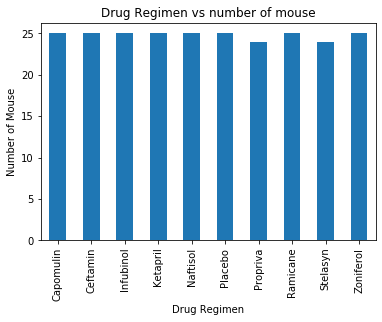

In [480]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

bar = cleandf.groupby(["Drug Regimen", "Mouse ID"])
barsum = pd.DataFrame(bar.count()).reset_index()
barsum2 = barsum.groupby(["Drug Regimen"])
barsum2["Mouse ID"].count()
pybar1 = pd.DataFrame(barsum2["Mouse ID"].count().reset_index())
pybar2 = pybar1.plot(kind = "bar", legend = False, title = "Drug Regimen vs number of mouse")
pybar2.set_xticklabels(pybar1["Drug Regimen"])
pybar2.set_xlabel("Drug Regimen")
pybar2.set_ylabel("Number of Mouse")


Text(0.5, 1.0, 'Drug Regimen vs Number of Mouse')

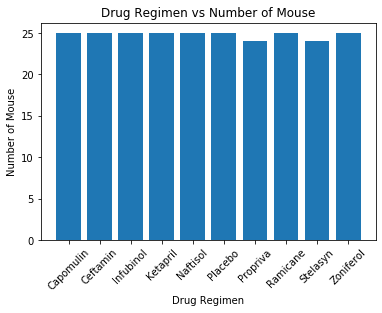

In [478]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

pybar = pd.DataFrame(barsum2["Mouse ID"].count().reset_index())
x_axis = np.arange(len(pybar["Drug Regimen"]))
plt.bar(x_axis, pybar["Mouse ID"])
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, [pybar["Drug Regimen"][value] for value in x_axis],rotation = 45)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mouse")
plt.title ("Drug Regimen vs Number of Mouse")


Text(0, 0.5, 'Gender')

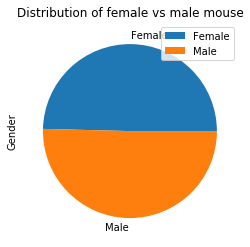

In [487]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

pie1 = cleandf[["Mouse ID", "Sex"]]
pie2 = pie1.groupby(["Sex", "Mouse ID"])
pie3 = pie2.count().reset_index()
pie4 = pie3.groupby("Sex").count()



genderpie1 = pie4.plot(kind= "pie", y = "Mouse ID", title = ("Distribution of female vs male mouse"))

genderpie1.set_ylabel("Gender")




Text(0, 0.5, 'Gender')

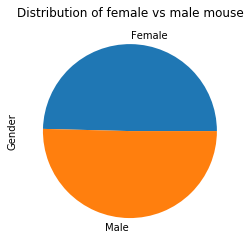

In [489]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

pie5 = pie4.reset_index()
sizes= pie5["Mouse ID"]
labels = pie5["Sex"]




genderpie2 = plt.pie(sizes, labels = labels)
plt.title ("Distribution of female vs male mouse")
plt.ylabel ("Gender")


## Quartiles, Outliers and Boxplots

In [338]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

fvolume = cleandf[(cleandf["Drug Regimen"] == "Capomulin") | (cleandf["Drug Regimen"] == "Ramicane") | (cleandf["Drug Regimen"] == "Infubinol") | (cleandf["Drug Regimen"] == "Ceftamin")].groupby(["Drug Regimen", "Mouse ID"])

maxvolume = pd.DataFrame(fvolume["Tumor Volume (mm3)"].max()).reset_index()
maxvolume

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Drug Regimen,Mouse ID,Tumor Volume (mm3)
0,Capomulin,b128,45.651331
1,Capomulin,b742,45.000000
2,Capomulin,f966,45.000000
3,Capomulin,g288,46.304003
4,Capomulin,g316,46.809225
...,...,...,...
95,Ramicane,s508,45.000000
96,Ramicane,u196,47.622816
97,Ramicane,w678,45.000000
98,Ramicane,y449,46.378092


In [404]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = maxvolume["Drug Regimen"].unique().tolist()

# Create empty list to fill with tumor vol data (for plotting)


volume = maxvolume["Tumor Volume (mm3)"].tolist()
volume2 = pd.Series(volume)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    
quartiles = volume2.quantile([.25, .5, .75])
lowerq = quartiles[0.25]
upperq = quartiles [0.75]
iqr = upperq - lowerq
lowerb = lowerq - (1.5 * iqr)
upperb = upperq + (1.5 * iqr)

center = np.ones(len(volume2)) * 50

#data = np.concatenate((volume2, upperb, lowerb))
print("Lower bound: ", lowerb, ", Upper Bound: ", upperb)

Lower bound:  23.87921808625 , Upper Bound:  81.56088795625001


Text(0.5, 1.0, 'Final tumor volume of four regimens of interest')

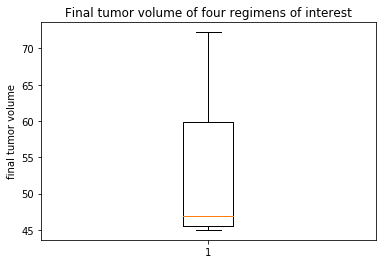

In [497]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax1 = plt.subplots()

green_diamond = dict(markerfacecolor='g', marker='D')
ax1.boxplot(volume2, flierprops = green_diamond, showfliers=True)

ax1.set_ylabel("final tumor volume")
ax1.set_title("Final tumor volume of four regimens of interest")


## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume')

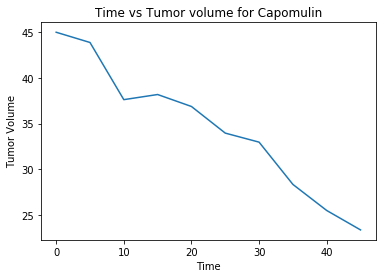

In [501]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

capo = cleandf[["Timepoint", "Tumor Volume (mm3)", "Mouse ID"]][(cleandf["Drug Regimen"] == "Capomulin") & (cleandf["Mouse ID"] == "s185")]

plt.plot(capo["Timepoint"], capo["Tumor Volume (mm3)"])

plt.title("Time vs Tumor volume for Capomulin")
plt.xlabel("Time")
plt.ylabel("Tumor Volume")



Text(0, 0.5, 'Average Tumor Volume')

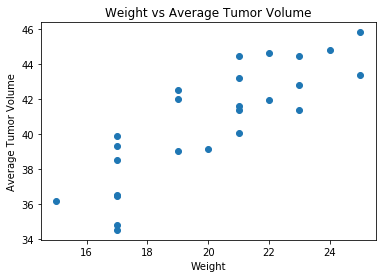

In [505]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

capo2 = cleandf[cleandf["Drug Regimen"] == "Capomulin"].groupby(["Mouse ID", "Weight (g)"])
caposum = pd.DataFrame(capo2["Tumor Volume (mm3)"].mean()).reset_index()
plt.scatter(caposum["Weight (g)"], caposum["Tumor Volume (mm3)"])

plt.title("Weight vs Average Tumor Volume")
plt.xlabel("Weight")
plt.ylabel("Average Tumor Volume")


## Correlation and Regression

Correlation Coefficient is:  0.84


Text(0, 0.5, 'Average Tumor Volume')

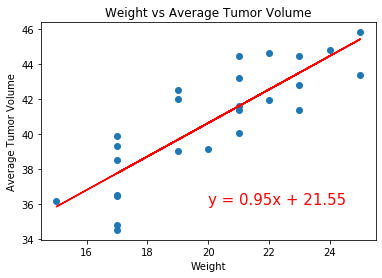

In [504]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

print("Correlation Coefficient is: ", round(st.pearsonr(caposum["Weight (g)"], caposum["Tumor Volume (mm3)"])[0],2))

x_values = caposum["Weight (g)"]
y_values = caposum["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq, (20, 36), fontsize = 15, color = "red")

plt.title("Weight vs Average Tumor Volume")
plt.xlabel("Weight")
plt.ylabel("Average Tumor Volume")
